# Predicting House Prices: Empower your real estate decisions with this interactive Python code

## Getting Required Libraries

In [2]:
import pandas as pd
import numpy as np
# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the CSV DataSet

In [3]:
# Loading the dataset from URL of the Raw File from GitHub
url = 'https://raw.githubusercontent.com/iamrahulhere/CVIP-House-Price-Prediction/main/House_DataSet.csv'

In [4]:
data = pd.read_csv(url)

## Discovering the DataSet

### Shape & Columns in DataSet

In [5]:
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)

Shape of the dataset: (13320, 9)
Columns in the dataset: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


### Head & Tail of DataSet

In [6]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


### DataTypes

In [8]:
#DataTypes Used
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

### Data Info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
print("Total number of Houses available:", len(data))

Total number of Houses available: 13320


## Organising by Columns

In [11]:
data["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [12]:
data["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [13]:
data["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [14]:
data["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
data["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [16]:
data["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [17]:
data["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [18]:
data["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [19]:
data["price"].value_counts()

75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
351.00      1
54.10       1
80.64       1
32.73       1
488.00      1
Name: price, Length: 1994, dtype: int64

## Visualization of Data

### Individual Data Visualization

Text(0.5, 1.0, 'Houses by Area Types')

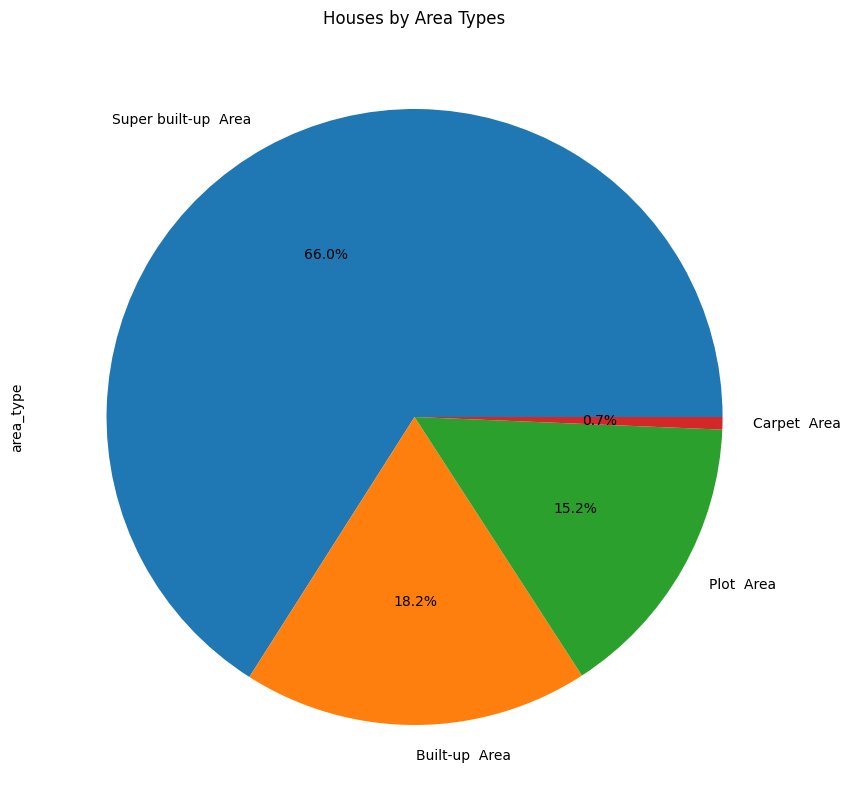

In [ ]:
data.area_type.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Houses by Area Types')

Text(0.5, 1.0, 'Houses by Location')

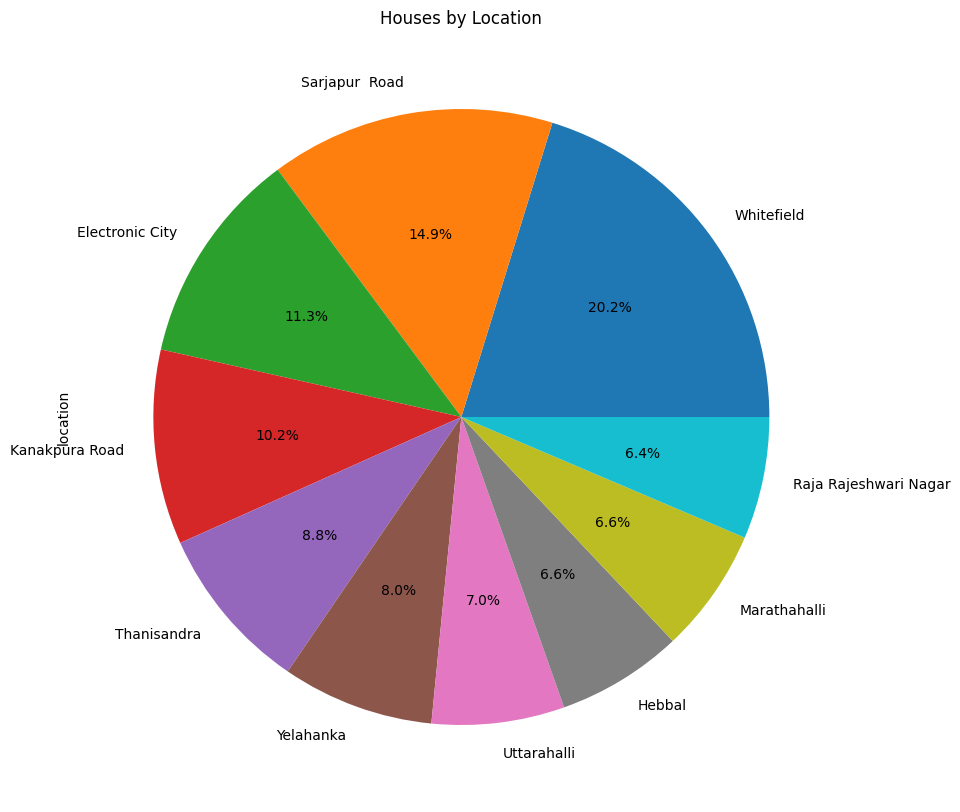

In [ ]:
data.location.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Houses by Location')

Text(0.5, 1.0, 'Houses by Society')

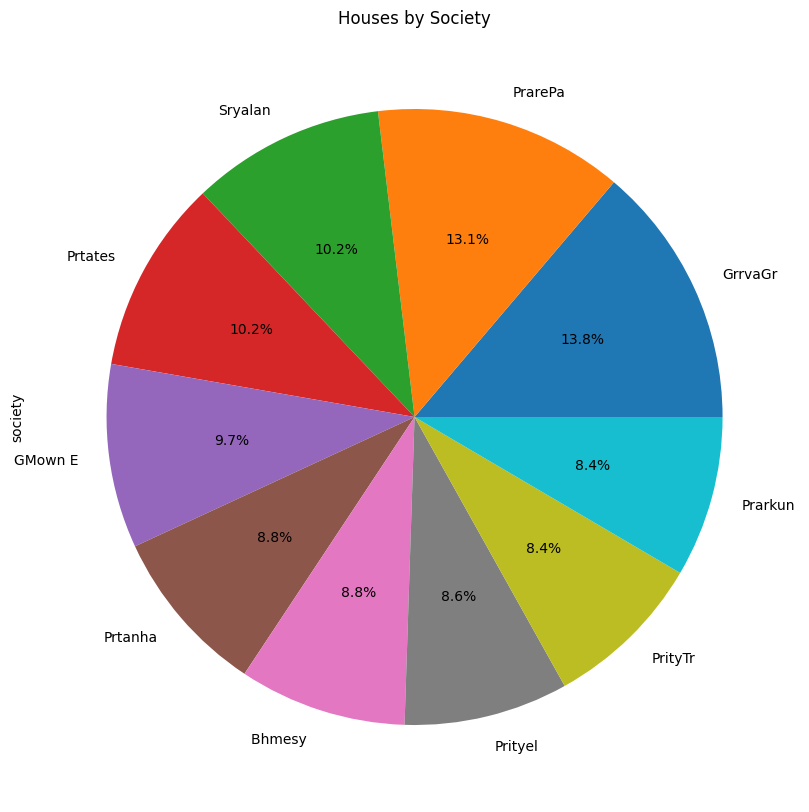

In [ ]:
data.society.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Houses by Society')

Text(0.5, 1.0, 'Houses by Area(Sqft)')

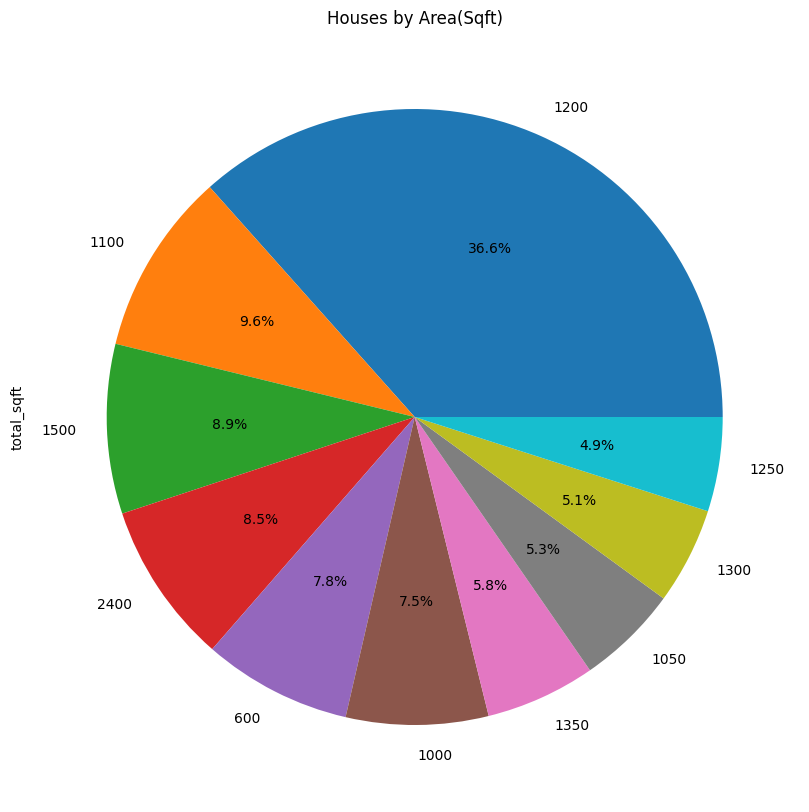

In [ ]:
data.total_sqft.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('Houses by Area(Sqft)')

### Comparison between Columns

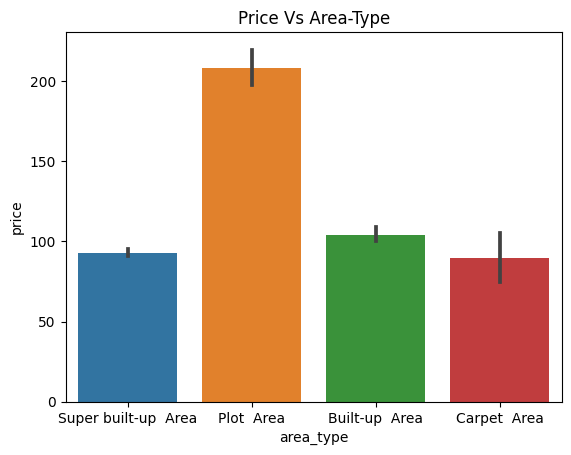

In [ ]:
sns.barplot(x='area_type',y='price',data=data)
plt.title("Price Vs Area-Type")
plt.show()

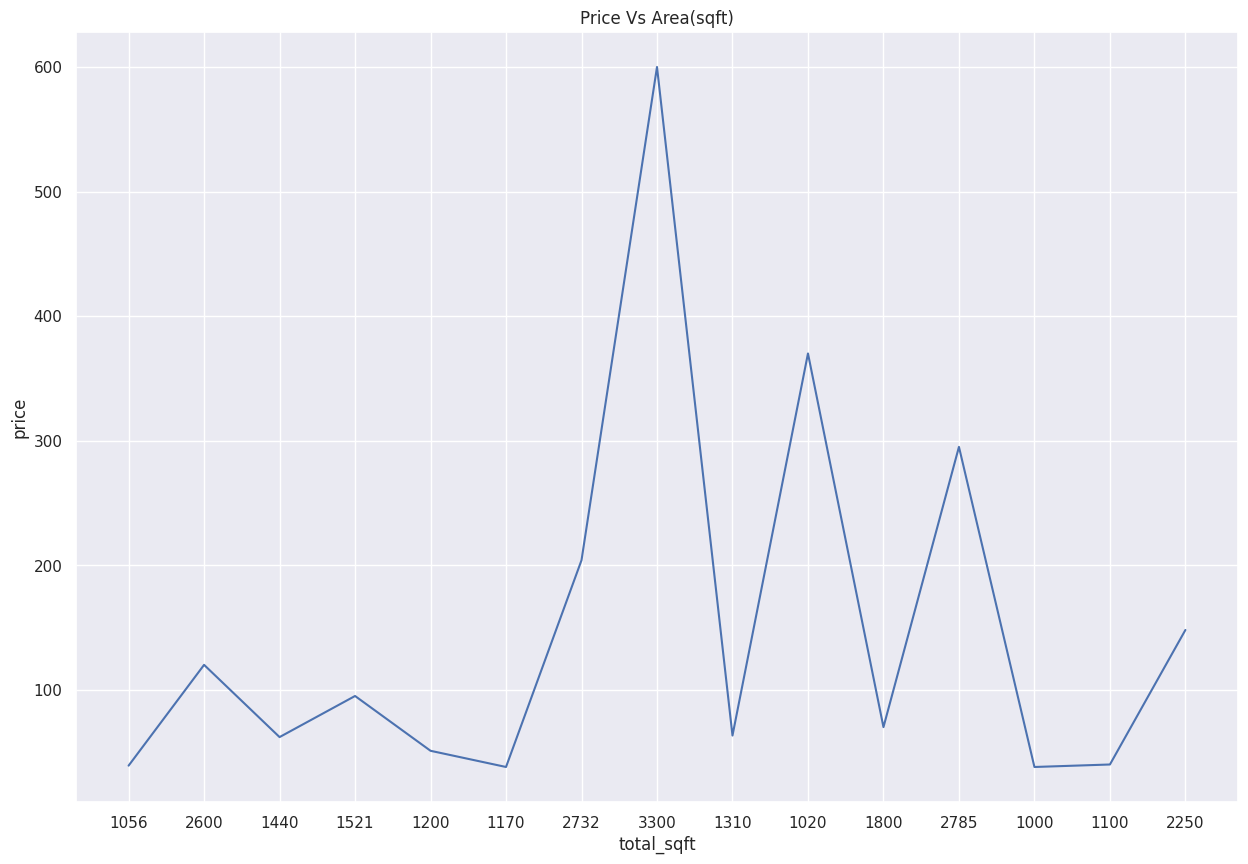

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y='price',x='total_sqft',data=data[:15])
plt.title("Price Vs Area(sqft)")
plt.show()